---
# DH140 Final Project
# Rachel Han
# August 1, 2024
# The Story of Kangetsu:
# Network Analysis of a Buddhist Scholar's Memoir
---

# Introduction
The project focuses on an unpublished memoir titled "Kangetsu: The Memoirs of Ruth Strout McCandless As Told to Günther Cologna in April 1994." The memoir is a part of the Ruth Strout McCandless Collection on Nyogen Senzaki, housed at UCLA's East Asian library. This collection, introduced to me by my supervisor, Dr. Jesse Drian, contains the memoir, which includes transcripts of eight tapes and recounts Ruth McCandless' life, particularly her involvement with Zen Buddhism. Throughout the memoir, she details interactions with prominent Zen Buddhists such as Nyogen Senzaki, Soen Nakagawa, Soyen Shaku, Eido Tai Shimano, and D. T. Suzuki. Additionally, she was involved with influential Indian philosophers like Vanda Scaravelli, Jiddu Krishnamurti, and Selvarajan Yesudian, as well as notable figures in the writing and creative industry such as Anne Lindbergh, Harriet Doerr, Wallace Stegner, and Peter Matthiessen. The memoir also touches on her connections with spiritualists like Carolyn Conger and Brian Weiss and the educators from Stanford University, including Edith R. Mirrielees, Anthony Sokol, and Wilfred Stone.

Given the numerous characters in the memoir, it became evident that a network analysis would be beneficial to understand Ruth McCandless's interactions and contributions to various fields, notably Zen Buddhism in mid-20th century America. By creating a network analysis, I aim to highlight her unique position as a female Buddhist scholar and elucidate the prominent figures in the development of Zen Buddhism in the United States. Additionally, the network analysis can illustrate the connections between individuals interested in Buddhism and those in the creative industry, offering a comprehensive view of the social landscape of an upper-class white female Buddhist scholar based in California during the twentieth century.

The memoir includes famous and non-famous individuals, but only recognized figures were included in the network analysis for privacy reasons. Despite the chronological order of the interview questions, a thorough reading revealed that the characters could be grouped into professions such as Indian Buddhist practitioner, Japanese Buddhist practitioner, creator, spiritualist, educator, and organizational personnel. Creators were divided into writer, actress, film producer, and publisher. 

This project aims to illuminate Ruth McCandless' significant contributions and connections within Zen Buddhism, Indian philosophy, and the creative industry through a comprehensive network analysis.


# Methods
## Data Preparation

1. Text Extraction and Cleaning:
- I began by converting an OCR-scanned document to text and saving it as "original copy 2.txt." This document contained Ruth Strout McCandless's memoirs.
- I utilized spaCy, an NLP library, to identify named entities within the text. I experimented with different pipelines: the medium-size pipeline (en_core_web_md), the large-size pipeline (en_core_web_lg), and the transformer pipeline (en_core_web_trf). I found that the results were almost the same across these pipelines. In this notebook, I only included the medium size pipeline. 
- I combined the named entity recognition (NER) results from these pipelines. I identified both famous and non-famous individuals mentioned in the memoir. For this project, I only focused on famous individuals. I created an Excel file named "Noa_Names.xlsx," which includes famous individuals. I compiled all variations of their names found in the NER process into one column, “Name in NER,” separated by commas, and included their full names in another column, “Full name.”


In [18]:
# The results from all three pipelines are similar. 
# You may execute the code with other pipelines to see the results.
# You may need to download other models as desired.
import spacy
from spacy import displacy
from collections import Counter
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_colwidth', 400)
nlp = spacy.load('en_core_web_md')
# nlp = spacy.load('en_core_web_lg')
# nlp = spacy.load('en_core_web_trf')

In [19]:
filepath = "original copy 2.txt"
with open(filepath, encoding='utf-8') as file:
    text = file.read()

# Process the text using SpaCy
document = nlp(text)

In [20]:
import math

# Define number of chunks and calculate chunk size
number_of_chunks = 80

# Split text into chunks
chunk_size = math.ceil(len(text) / number_of_chunks)

# Split the text into chunks using list comprehension
text_chunks = [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]

In [65]:
# Process text chunks with spaCy
chunked_documents = list(nlp.pipe(text_chunks))

In [66]:
# Extract and count named entities labeled as "PERSON"
people = [named_entity.text for document in chunked_documents for named_entity in document.ents if named_entity.label_ == "PERSON"]

people_tally = Counter(people)

df_people = pd.DataFrame(people_tally.most_common(), columns=['character', 'count'])
print(df_people.head(10))

        character  count
0          Duncan     95
1            John     62
2           Keith     62
3  Senzaki Sensei     47
4      Krishna-ji     47
5      Soen Roshi     30
6            Kirk     30
7           Vanda     29
8         Gunther     24
9             Zen     18


2. Text Pre-processing:
 - To create a suitable node-edge table for network analysis, I pre-processed "original copy 2.txt." I removed all unnecessary information, such as titles, endings, punctuation, line breaks, and page breaks. Additionally, "tape 1" to "tape 8" are notations at the beginning of every tape recording. Because of the OCR, tapes plus numbers are sometimes recognized as slightly different, such as "crape 5." Therefore, I developed a regular expression for capturing variations of the word "tape" with a number from 1 to 8 and deleting them.
 - I saved the cleaned text as "processed.txt."


In [4]:
# Removing all punctuations
file_path = 'original copy 2.txt'

# Read the content of the file
with open(file_path, 'r') as file:
    content = file.read()

import string

# Create a translation table to map each punctuation character to None
translator = str.maketrans('', '', string.punctuation)

nopunctuation_content = content.translate(translator)

first_onehundred_characters = nopunctuation_content[:100]
print(first_onehundred_characters)


Tape 1

This was in Japan I think about 196465 and Senzaki Sensei had not
been back to Japan since


In [5]:

# Create a regex pattern to match various misspellings or variations of "Tape" followed by numbers 1 to 8, such as <Tape 1, crape 5...
import re
pattern = re.compile(r"\b(?:<|CJ'|'l'|c|r)?[TtCcRr]'?[Aa][Pp][Ee]?\s*[1-8]\b")

# extract 
# Split the content into lines
lines = nopunctuation_content.split('\n')

# Filter out lines matching the pattern
filtered_lines = [line for line in lines if not pattern.search(line)]

# Join the filtered lines back into a single string
notape_content = '\n'.join(filtered_lines)

first_onehundred_characters = notape_content[:100]
print(first_onehundred_characters)



This was in Japan I think about 196465 and Senzaki Sensei had not
been back to Japan since he had 


In [6]:
#deleting all the line breaks and page breaks 

nolinebreaks_content = notape_content.replace('\n', ' ').replace('\r', ' ').replace('\f', '')

first_fivehundred_characters = notape_content[:500]
print(first_fivehundred_characters)



This was in Japan I think about 196465 and Senzaki Sensei had not
been back to Japan since he had left it early in the century to follow
Shaku Soen and Daisetsu Teitaro Suzuki to the United States It was a
beautiful beautiful day a Japanese day I would say There was a very
gentle shiguritype rain and little diamond raindrops would come
down the fetch of the monastery There was also some sort of
celebration I dont know which one possibly of Buddhas birthday
Roshi abbots priests of Zen had gathe


3. Name Replacement:
- Using the list of famous people's names from "Noa_Names.xlsx," I replaced all variations of these names in "processed.txt" with their full names. The updated file was saved as "rename.txt."
- As seen in the “Noa_Names.xlsx” file, I also replaced the pronouns “I,” “my,” “me,” and “mine” with “Ruth McCandless.” Although this approach is imperfect, it suffices for the project's needs. Since mentions of “Ruth McCandless” are rare in the original text, and she is the relater and central figure of the network, this replacement is necessary.
- I added regular expressions with '?<=\s' in the front and back of words to indicate two blank spaces before and after the word, ensuring it is recognized as a standalone. This prevents partial replacements, in other words.
- I manually rearranged longer name variations to be listed before shorter ones. For example, I ordered them as “Senzaki Senseis, Senzaki-sans, Senzaki Sensei, Senzaki.” This prevents repetitive replacements, such as replacing “Senzaki Senseis” with “Nyogen Senzaki” and then erroneously replacing “Nyogen Senzaki” with “Nyogen Nyogen Senzaki.”


In [7]:
# Open a file in write mode
with open("processed.txt", "w") as file:
    # Write the string to the file
    file.write(nolinebreaks_content)

In [21]:
import pandas as pd

# Load the specific worksheet from the Excel file
df = pd.read_excel('Noa_Names.xlsx', sheet_name='Famous People')

# Read the text from the file
with open('processed.txt', 'r') as file:
   text = file.read().strip()

In [22]:
text1 = df['Name in NER'][1]
text2 = df['Full name'][1]

# Replace commas with pipe characters in the 'Name in NER' column

df['Name in NER'] = df[['Name in NER']].apply(lambda x: x.str.replace(", ", "|"))
# Iterate over each row in the DataFrame

for i in df.index:
   # Get the 'Name in NER' and 'Full name' for the current row
   text1 = df['Name in NER'][i]
   text2 = df['Full name'][i]
   # Replace occurrences of names in 'text' with their full names
   text = re.sub(text1, text2, text)
    
first_fivehundred_characters = text[:500]
print(first_fivehundred_characters)

This was in Japan Ruth McCandless think about 196465 and Nyogen Senzaki had not been back to Japan since he had left it early in the century to follow Soyen Shaku Nakagawa and D. T. Suzuki to the United States It was a beautiful beautiful day a Japanese day Ruth McCandless would say There was a very gentle shiguritype rain and little diamond raindrops would come down the fetch of the monastery There was also some sort of celebration Ruth McCandless dont know which one possibly of Buddhas birthda


In [23]:
with open('rename.txt', 'w') as file:
    file.write(text)

4. Node-Edge Table:
- Following the method used by Andrew Beveridge and Jie Shan in their paper "Network of Thrones," I calculated the frequency of co-occurrences of characters within 15 words of each other in the text. My method is a simpler version because it does not consider pronouns or dialogues. The interview has a straightforward structure compared to novels. The interviewee recounted what had happened.
- This frequency data was used to create a node-edge table, representing the degree of connections between individuals in the memoir.

In [24]:
#Convert names in a column to a list

df = pd.read_excel('Noa_Names.xlsx', sheet_name='Famous People')
name_column = df['Full name']

names = name_column.tolist()  

print(names)

['Jiddu Krishnamurti', 'Nyogen Senzaki', 'Soen Nakagawa', 'Vanda Scaravelli', 'William Brugh Joy', 'Anne Lindbergh', 'D. T. Suzuki', 'Ruth McCandless', 'Radha Rajagopal Sloss', 'Soyen Shaku', 'Eido Tai Shimano', 'Sohaku Ogata', 'Helen Corral', 'Edith R. Mirrielees', 'Carolyn Conger', 'Harriet Doerr', 'Mary Zimbalist', 'Sōgen Asahina', 'Robert Baker Aitken', 'Brian Weiss', 'Wallace Stegner', 'Shubin Tanahashi', 'Anthony Sokol', 'Beatrice Wood', 'Wilfred Stone', 'Geoffrey Farwell', 'Zentatsu Richard Baker', 'Bill Rample', 'Noel Rodriguez', 'Peter Matthiessen', 'Felix Wolff', 'Helen Wolff', 'Manly P. Hall', 'Paul Reps', 'Frederick Spiegelberg', 'John Dodds', 'Gary Snyder', 'Jack Kerouac', 'Reginald Berkeley', 'George Gurdjieff', 'Alan Watts', 'Robertson Davies', 'Sam Zimbalist', 'Elisabeth Haich', 'Selvarajan Yesudian']


In [25]:
# create a node-edge table that calculates the numbers of occurrence of names within 15 words
from collections import defaultdict

# Load the text data
file_path = 'rename.txt'
with open(file_path, 'r') as file:
    text = file.read()

# Split text into words
words = text.split()
positions = {i: word for i, word in enumerate(words)}

matches = []

# Check each word and see if it matches any name
for i in range(len(words)):
    for name in names:
        name_words = name.split()
        if words[i:i + len(name_words)] == name_words:
            matches.append((name, i))

# Create a dictionary and calculate co-occurrences within 15 words
co_occurrences = defaultdict(int)

for i, (name1, pos1) in enumerate(matches):
    for name2, pos2 in matches[i + 1:]:
        if name1 != name2 and abs(pos2 - pos1) <= 15:
            pair = tuple(sorted((name1, name2)))
            co_occurrences[pair] += 1

# Create a DataFrame to display the results
data = [{'Source': source, 'Target': target, 'Weight': weight} for (source, target), weight in co_occurrences.items()]

df = pd.DataFrame(data)

pd.set_option('display.max_rows', 100)
print(df)

                   Source                  Target  Weight
0          Nyogen Senzaki         Ruth McCandless      80
1            D. T. Suzuki             Soyen Shaku       3
2         Ruth McCandless           Sōgen Asahina       8
3         Ruth McCandless           Soen Nakagawa      55
4           Soen Nakagawa           Sōgen Asahina       1
5        Eido Tai Shimano         Ruth McCandless       6
6           Manly P. Hall         Ruth McCandless       7
7         Ruth McCandless             Soyen Shaku       1
8         Ruth McCandless       William Brugh Joy      30
9          Nyogen Senzaki           Soen Nakagawa      13
10           D. T. Suzuki          Nyogen Senzaki       3
11           D. T. Suzuki         Ruth McCandless       9
12        Ruth McCandless            Sohaku Ogata       4
13         Nyogen Senzaki            Sohaku Ogata       3
14         Nyogen Senzaki  Zentatsu Richard Baker       2
15     Jiddu Krishnamurti         Ruth McCandless      10
16     Jiddu K

## Network Visualization

### 1. Community-Based Network Graph:
   - Using the node-edge table, I created a network graph with line width to reflect the weights resulting from the name closeness count and colored based on their modularity class (communities). This classification helped visualize clusters of closely connected individuals. The title of the graph is “Memoir Network by Modularity Class.”
   - In addition, I created a network graph without Ruth McCandless. The title of the graph is “Memoir Network by Modularity Class Without Ruth McCandless."

### 'Memoir Network by Modularity Class'

In [26]:
# Creating an interactive network with labels and responsive highlighting for communities 
import networkx
import matplotlib.pyplot as plt
import numpy as np

from bokeh.io import output_notebook, show, save
output_notebook()

Loading BokehJS ...

In [27]:
G = networkx.from_pandas_edgelist(df, 
                                  'Source', 
                                  'Target', 
                                  'Weight')

In [28]:
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, NodesAndLinkedEdges, LabelSet
from bokeh.plotting import figure, from_networkx, show, save, output_file
from bokeh.palettes import BuRd8, Viridis256
from bokeh.transform import linear_cmap
from networkx.algorithms import community

In [29]:
#Calculate the degree for each node and add it as a node attribute
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)

In [30]:
communities = community.greedy_modularity_communities(G)

In [31]:
modularity_class = {}
modularity_color = {}

#Loop through each community
for community_number, community in enumerate(communities):
    color = BuRd8[community_number % len(BuRd8)]  
    for name in community: 
        modularity_class[name] = community_number
        modularity_color[name] = color

networkx.set_node_attributes(G, name='modularity_class', values=modularity_class)
networkx.set_node_attributes(G, name='modularity_color', values=modularity_color)

In [32]:
title = 'Memoir Network by Modularity Class'

#Define the colors used to highlight nodes and edges
node_highlight_color = 'yellow'
edge_highlight_color = 'red'

#Determine the attributes from the network that set the radius and color of nodes
node_radius_attribute = 1
node_color_attribute = 'modularity_color'

#Define categories
TOOLTIPS = [
       ("Modularity Class", "@modularity_class"),
       ("Character", "@index"),
       ("Modularity Color", "$color[swatch]:modularity_color"),
       ("Degree", "@degree")
]

#Generate a plot with specified dimensions, toolbar options, and title
plot = figure(tooltips = TOOLTIPS, tools="wheel_zoom,reset,save,pan", active_scroll='wheel_zoom',
              x_range=Range1d(-22, 22), y_range=Range1d(-22, 22), title=title)

#Construct a network graph object from the network data
network_graph = from_networkx(G, networkx.spring_layout, scale=20, center=(0, 0))

#Assign the colors used to highlight edges
network_graph.edge_renderer.hover_glyph = MultiLine(line_color=edge_highlight_color)
network_graph.edge_renderer.selection_glyph = MultiLine(line_color=edge_highlight_color)

#Adjust the radius and colors of nodes based on their degree
network_graph.node_renderer.glyph = Circle(radius=node_radius_attribute, fill_color=node_color_attribute)

# Define a linear color mapper for edge weights
edge_weights = [G[u][v]['Weight'] for u, v in G.edges()]
min_weight = min(edge_weights)
max_weight = max(edge_weights)
edge_cmap = linear_cmap('Weight', palette=Viridis256, low=min_weight, high=max_weight)

# Scale weights to a smaller range
scaled_weights = [1 + 50 * (w - min_weight) / (max_weight - min_weight) for w in edge_weights]
edge_cmap = linear_cmap('Weight', palette=Viridis256, low=min_weight, high=max_weight)

# Define the opacity and width for edges based on scaled weights
network_graph.edge_renderer.data_source.data['scaled_weight'] = scaled_weights
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width='scaled_weight', line_color=edge_cmap)

# Specify the colors used to highlight nodes
network_graph.node_renderer.selection_glyph = Circle(radius=node_radius_attribute, fill_color=node_highlight_color)
network_graph.node_renderer.hover_glyph = Circle(radius=node_radius_attribute, fill_color=node_highlight_color)

#Enable highlighting of nodes and edges
network_graph.inspection_policy = NodesAndLinkedEdges()
network_graph.selection_policy = NodesAndLinkedEdges()

plot.renderers.append(network_graph)

#Add Labels to the graph
x, y = zip(*network_graph.layout_provider.graph_layout.values())
node_labels = list(G.nodes())
source = ColumnDataSource({'x': x, 'y': y, 'name': [node_labels[i] for i in range(len(x))]})
labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', 
                  text_font_size='10px', background_fill_alpha=0.7)
plot.renderers.append(labels)

output_file(f"{title}.html", title=title)
show(plot)
save(plot)

'/home/jovyan/Final-project-DH140/Memoir Network by Modularity Class.html'

Result 1: Memoir Network by Modularity Class

This graph focuses on modularity class, a measure of the strength of a network's division into communities.

Features: The colors of the nodes are from colorblind-friendly palettes.

Usage: This graph is helpful for automatically visualizing the community structure within the network, showing how individuals are grouped based on their connections. It works better with extended text and a large amount of characters.

Findings: Ruth McCandless is the central figure. High-degree nodes like Soen Nakagawa, Nyogen Senzaki, and William Brugh Joy are influential within the network and fit with the insights from the close reading. The width of the edges connecting these figures with Ruth McCandless reflects the closeness between the characters and the central figure. The communities are inaccurate because the modularity class does not represent the connections between characters' knowledge gained in close reading.

### 'Memoir Network by Modularity Class Without Ruth McCandless'

In [33]:
# Remove rows containing "Ruth McCandless" in either the "Source" or "Target" columns
df_filtered = df[~df['Source'].str.contains("Ruth McCandless") & ~df['Target'].str.contains("Ruth McCandless")]

print(df_filtered)

                Source                  Target  Weight
1         D. T. Suzuki             Soyen Shaku       3
4        Soen Nakagawa           Sōgen Asahina       1
9       Nyogen Senzaki           Soen Nakagawa      13
10        D. T. Suzuki          Nyogen Senzaki       3
13      Nyogen Senzaki            Sohaku Ogata       3
14      Nyogen Senzaki  Zentatsu Richard Baker       2
16  Jiddu Krishnamurti           Soen Nakagawa       2
17  Jiddu Krishnamurti          Nyogen Senzaki       2
21      Nyogen Senzaki               Paul Reps       1
24      Nyogen Senzaki         Wallace Stegner       1
26       Beatrice Wood              John Dodds       1
30         Gary Snyder            Jack Kerouac       1
31       Soen Nakagawa       William Brugh Joy       3
35    George Gurdjieff          Nyogen Senzaki       1
36    George Gurdjieff           Soen Nakagawa       1
37        D. T. Suzuki        George Gurdjieff       1
38    George Gurdjieff      Jiddu Krishnamurti       1
39      Ny

In [34]:
G_filtered = networkx.from_pandas_edgelist(df_filtered, 
                                  'Source', 
                                  'Target', 
                                  'Weight')

In [35]:
#Calculate the degree for each node and add it as a node attribute
degrees = dict(networkx.degree(G_filtered))
networkx.set_node_attributes(G_filtered, name='degree', values=degrees)

In [36]:
modularity_class = {}
modularity_color = {}

#Loop through each community
for community_number, community in enumerate(communities):
    color = BuRd8[community_number % len(BuRd8)]  
    for name in community: 
        modularity_class[name] = community_number
        modularity_color[name] = color

networkx.set_node_attributes(G_filtered, name='modularity_class', values=modularity_class)
networkx.set_node_attributes(G_filtered, name='modularity_color', values=modularity_color)

In [37]:
title = 'Memoir Network by Modularity Class Without Ruth McCandless'

#Define the colors used to highlight nodes and edges
node_highlight_color = 'yellow'
edge_highlight_color = 'red'

#Determine the attributes from the network that set the radius and color of nodes
node_radius_attribute = 0.3
node_color_attribute = 'modularity_color'

#Define categories
TOOLTIPS = [
       ("Modularity Class", "@modularity_class"),
       ("Character", "@index"),
       ("Modularity Color", "$color[swatch]:modularity_color"),
       ("Degree", "@degree")
]

#Generate a plot with specified dimensions, toolbar options, and title
plot = figure(tooltips = TOOLTIPS, tools="wheel_zoom,reset,save,pan", active_scroll='wheel_zoom',
              x_range=Range1d(-22, 22), y_range=Range1d(-22, 22), title=title)

#Construct a network graph object from the network data
network_graph = from_networkx(G_filtered, networkx.spring_layout, scale=20, center=(0, 0))

#Assign the colors used to highlight edges
network_graph.edge_renderer.hover_glyph = MultiLine(line_color=edge_highlight_color)
network_graph.edge_renderer.selection_glyph = MultiLine(line_color=edge_highlight_color)

#Adjust the radius and colors of nodes based on their degree
network_graph.node_renderer.glyph = Circle(radius=node_radius_attribute, fill_color=node_color_attribute)

# Define a linear color mapper for edge weights
edge_weights = [G_filtered[u][v]['Weight'] for u, v in G_filtered.edges()]
min_weight = min(edge_weights)
max_weight = max(edge_weights)
edge_cmap = linear_cmap('Weight', palette=Viridis256, low=min_weight, high=max_weight)

# Scale weights to a smaller range
scaled_weights = [1 + 20 * (w - min_weight) / (max_weight - min_weight) for w in edge_weights]
edge_cmap = linear_cmap('Weight', palette=Viridis256, low=min_weight, high=max_weight)

# Define the opacity and width for edges based on scaled weights
network_graph.edge_renderer.data_source.data['scaled_weight'] = scaled_weights
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width='scaled_weight', line_color=edge_cmap)

# Specify the colors used to highlight nodes
network_graph.node_renderer.selection_glyph = Circle(radius=node_radius_attribute, fill_color=node_highlight_color)
network_graph.node_renderer.hover_glyph = Circle(radius=node_radius_attribute, fill_color=node_highlight_color)

#Enable highlighting of nodes and edges
network_graph.inspection_policy = NodesAndLinkedEdges()
network_graph.selection_policy = NodesAndLinkedEdges()

plot.renderers.append(network_graph)

#Add Labels to the graph
x, y = zip(*network_graph.layout_provider.graph_layout.values())
node_labels = list(G_filtered.nodes())
source = ColumnDataSource({'x': x, 'y': y, 'name': [node_labels[i] for i in range(len(x))]})
labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', 
                  text_font_size='10px', background_fill_alpha=0.7)
plot.renderers.append(labels)

output_file(f"{title}.html", title=title)
show(plot)
save(plot)

'/home/jovyan/Final-project-DH140/Memoir Network by Modularity Class Without Ruth McCandless.html'

Result 2: Memoir Network by Modularity Class Without Ruth McCandless

In a graph without Ruth McCandless, the characters are grouped into different groups. First, the largest group is roughly connected due to their involvement with Zen Buddhism. Most noteabley, Nyogen Senzaki and Soen Nakagawa are the two central figures in the graph. There are other characters are only loosely connected to the graph which are Helen Corral and Felix Wolff. They are only connected to Anne Lindbergh rather than the central figure.  
Features: The colors of the nodes are from colorblind-friendly palettes.

### Profession Cooccurrence Network

In [42]:
import networkx as nx
from bokeh.palettes import Viridis256
from collections import Counter

# Professions dictionary
professions = {
    'Jiddu Krishnamurti': 'Indian Buddhist Practitioner',
    'Nyogen Senzaki': 'Japanese Buddhist Practitioner',
    'Soen Nakagawa': 'Japanese Buddhist Practitioner',
    'Vanda Scaravelli': 'Indian Buddhist Practitioner',
    'William Brugh Joy': 'Spiritualist',
    'Anne Lindbergh': 'Writer',
    'D. T. Suzuki': 'Japanese Buddhist Practitioner',
    'Ruth McCandless': 'Japanese Buddhist Practitioner',
    'Radha Rajagopal Sloss': 'Indian Buddhist Practitioner',
    'Soyen Shaku': 'Japanese Buddhist Practitioner',
    'Eido Tai Shimano': 'Japanese Buddhist Practitioner',
    'Sohaku Ogata': 'Japanese Buddhist Practitioner',
    'Helen Corral': 'Actress',
    'Edith R. Mirrielees': 'Educator',
    'Carolyn Conger': 'Spiritualist',
    'Harriet Doerr': 'Writer',
    'Mary Zimbalist': 'Actress',
    'Sōgen Asahina': 'Japanese Buddhist Practitioner',
    'Robert Baker Aitken': 'Japanese Buddhist Practitioner',
    'Brian Weiss': 'Spiritualist',
    'Wallace Stegner': 'Writer',
    'Shubin Tanahashi': 'Japanese Buddhist Practitioner',
    'Anthony Sokol': 'Educator',
    'Beatrice Wood': 'Painter',
    'Wilfred Stone': 'Educator',
    'Geoffrey Farwell': 'Organizational Personnel',
    'Zentatsu Richard Baker': 'Japanese Buddhist Practitioner',
    'Bill Rample': 'Organizational Personnel',
    'Noel Rodriguez': 'Japanese Buddhist Practitioner',
    'Peter Matthiessen': 'Writer',
    'Felix Wolff': 'Publisher',
    'Helen Wolff': 'Publisher',
    'Dennis Merzel': 'Japanese Buddhist Practitioner',
    'Manly P. Hall': 'Writer',
    'Paul Reps': 'Writer',
    'Frederick Spiegelberg': 'Educator',
    'John Dodds': 'Educator',
    'Gary Snyder': 'Writer',
    'Jack Kerouac': 'Writer',
    'Reginald Berkeley': 'Writer',
    'George Gurdjieff': 'Spiritualist',
    'Alan Watts': 'Japanese Buddhist Practitioner',
    'Robertson Davies': 'Writer',
    'Sam Zimbalist': 'Film Producer',
    'Elisabeth Haich': 'Indian Buddhist Practitioner',
    'Selvarajan Yesudian': 'Indian Buddhist Practitioner'
}

# Map names to professions
df['Source_Profession'] = df['Source'].map(professions)
df['Target_Profession'] = df['Target'].map(professions)

# Create a new DataFrame with professions and co-occurrence counts
profession_pairs = list(zip(df['Source_Profession'], df['Target_Profession']))
profession_counter = Counter(profession_pairs)
df_professions = pd.DataFrame(profession_counter.items(), columns=['Profession_Pair', 'Weight'])

# Split the profession pairs into separate columns
df_professions[['Source_Profession', 'Target_Profession']] = pd.DataFrame(df_professions['Profession_Pair'].tolist(), index=df_professions.index)
df_professions.drop(columns=['Profession_Pair'], inplace=True)

# Create the graph
G_professions = nx.from_pandas_edgelist(df_professions, 'Source_Profession', 'Target_Profession', 'Weight')

# Define the colors used to highlight nodes and edges
node_highlight_color = 'yellow'
edge_highlight_color = 'red'

# Determine the attributes from the network that set the radius and color of nodes
node_radius_attribute = 1
node_color_attribute = 'modularity_color'

# Generate a plot with specified dimensions, toolbar options, and title
plot = figure(tools="wheel_zoom,reset,save,pan", active_scroll='wheel_zoom',
              x_range=Range1d(-22, 22), y_range=Range1d(-22, 22), title='Profession Co-occurrence Network')

# Construct a network graph object from the network data
network_graph = from_networkx(G_professions, nx.spring_layout, scale=20, center=(0, 0))

# Define a linear color mapper for edge weights
edge_weights = [G_professions[u][v]['Weight'] for u, v in G_professions.edges()]
min_weight = min(edge_weights)
max_weight = max(edge_weights)
# Scale weights to a smaller range
scaled_weights = [1 + 70 * (w - min_weight) / (max_weight - min_weight) for w in edge_weights]
edge_cmap = linear_cmap('Weight', palette=Viridis256, low=min_weight, high=max_weight)

# Define the opacity and width for edges based on scaled weights
network_graph.edge_renderer.data_source.data['scaled_weight'] = scaled_weights
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width='scaled_weight', line_color=edge_cmap)

# Specify the colors used to highlight nodes
network_graph.node_renderer.selection_glyph = Circle(radius=node_radius_attribute, fill_color=node_highlight_color, line_width=3)
network_graph.node_renderer.hover_glyph = Circle(radius=node_radius_attribute, fill_color=node_highlight_color, line_width=3)

# Enable highlighting of nodes and edges
network_graph.inspection_policy = NodesAndLinkedEdges()
network_graph.selection_policy = NodesAndLinkedEdges()

plot.renderers.append(network_graph)

# Add Labels to the graph
x, y = zip(*network_graph.layout_provider.graph_layout.values())
node_labels = list(G_professions.nodes())
source = ColumnDataSource({'x': x, 'y': y, 'name': [node_labels[i] for i in range(len(x))]})
labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white',
                  text_font_size='10px', background_fill_alpha=0.7)
plot.renderers.append(labels)

output_file("Profession_Cooccurrence_Network.html", title='Profession Co-occurrence Network')
show(plot)
save(plot)


'/home/jovyan/Final-project-DH140/Profession_Cooccurrence_Network.html'

Result 3: Profession_Cooccurrence_Network

The nodes represent professions and the line widths reflect the count of co-occurrences for professions. 
The graph shows educators and spirtualists are closely connected to Japanese Buddhist practitioners. Writers are the second. Actresses, organizational personnels, and Indian Buddhist practitioners are the third. 

### 2. Profession-Based Network Graphs:
   - Though Community-Based Network Graph could give us some insights about the network in the text, given the diversity of professions, I aimed to group nodes by their professions to provide a clearer visualization, where nodes were colored based on their professions.
   - For I assigned each individual to a profession category, which are Indian Buddhist Practitioner, Japanese Buddhist Practitioner, Creator, Spiritualist, Educator, or Organizational Personnel. The title of this graph is “Memoir Network by Six Professions”
   - Creators were further divided into sub-categories: Writer, Actress, Film Producer, and Publisher. The title of this graph is “Memoir Network by Eleven Professions'
   - I also calculated the degree and betweenness centrality of the dataframe. 
   - Given the diversity of professions in the graph, I aimed to group them together by related professions within the same area. Despite my attempts, I faced challenges in achieving this grouping effectively. The two failed appoarches are named “Failled: Memoir Network by Professions Grouped Horizontally” and “Failled: Memoir Network by Professions Grouped Separately”


### “Memoir Network by Six Professions”

In [89]:
from bokeh.models import Legend, LegendItem, Scatter
from bokeh.palettes import Light, HighContrast, Bright
import networkx as nx

In [90]:
# Assign professions to people 

professions = {
    'Jiddu Krishnamurti': 'Indian Buddhist Practitioner',
    'Nyogen Senzaki': 'Japanese Buddhist Practitioner',
    'Soen Nakagawa': 'Japanese Buddhist Practitioner',
    'Vanda Scaravelli': 'Indian Buddhist Practitioner',
    'William Brugh Joy': 'Spiritualist',
    'Anne Lindbergh': 'Creator',
    'D. T. Suzuki': 'Japanese Buddhist Practitioner',
    'Ruth McCandless': 'Japanese Buddhist Practitioner',
    'Radha Rajagopal Sloss': 'Indian Buddhist Practitioner',
    'Soyen Shaku': 'Japanese Buddhist Practitioner',
    'Eido Tai Shimano': 'Japanese Buddhist Practitioner',
    'Sohaku Ogata': 'Japanese Buddhist Practitioner',
    'Helen Corral': 'Creator',
    'Edith R. Mirrielees': 'Educator',
    'Carolyn Conger': 'Spiritualist',
    'Harriet Doerr': 'Creator',
    'Mary Zimbalist': 'Creator',
    'Sōgen Asahina': 'Japanese Buddhist Practitioner',
    'Robert Baker Aitken': 'Japanese Buddhist Practitioner',
    'Brian Weiss': 'Spiritualist',
    'Wallace Stegner': 'Creator',
    'Shubin Tanahashi': 'Japanese Buddhist Practitioner',
    'Anthony Sokol': 'Educator',
    'Beatrice Wood': 'Creator',
    'Wilfred Stone': 'Educator',
    'Geoffrey Farwell': 'Organizational Personnel',
    'Zentatsu Richard Baker': 'Japanese Buddhist Practitioner',
    'Bill Rample': 'Organizational Personnel',
    'Noel Rodriguez': 'Japanese Buddhist Practitioner',
    'Peter Matthiessen': 'Creator',
    'Felix Wolff': 'Creator',
    'Helen Wolff': 'Creator',
    'Dennis Merzel': 'Japanese Buddhist Practitioner',
    'Manly P. Hall': 'Creator',
    'Paul Reps': 'Creator',
    'Frederick Spiegelberg': 'Educator',
    'John Dodds': 'Educator',
    'Gary Snyder': 'Creator',
    'Jack Kerouac': 'Creator',
    'Reginald Berkeley': 'Creator',
    'George Gurdjieff': 'Spiritualist',
    'Alan Watts': 'Japanese Buddhist Practitioner',
    'Robertson Davies': 'Creator',
    'Sam Zimbalist': 'Creator',
    'Elisabeth Haich': 'Indian Buddhist Practitioner',
    'Selvarajan Yesudian': 'Indian Buddhist Practitioner'
}

# Assign professions to nodes
for node in G.nodes():
    if node in professions:
        G.nodes[node]['profession'] = professions[node]

# Create a color palette for professions
profession_color_palette = {
    'Indian Buddhist Practitioner': Light[7][0],
    'Japanese Buddhist Practitioner': Light[7][1],
    'Creator': Light[7][2],
    'Educator': Light[7][3],
    'Spiritualist': Light[7][4],
    'Organizational Personnel': Light[7][5]
}

# Assign colors to nodes based on profession
for node in G.nodes():
    G.nodes[node]['profession_color'] = profession_color_palette[G.nodes[node]['profession']]

# Define the colors used to highlight nodes and edges
node_highlight_color = 'purple'
edge_highlight_color = 'yellowgreen'

# Define tooltips
HOVER_TOOLTIPS = [
    ("Character", "@index"),
    ("Degree", "@degree"),
    ("Profession", "@profession"),
    ("Profession Color", "$color[swatch]:profession_color"),
]

title = 'Memoir Network by Six Professions'

# Generate a plot with specified dimensions, toolbar options, and title
plot = figure(tooltips=HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
              x_range=Range1d(-30, 30), y_range=Range1d(-30, 30), title=title,
              width=800, height=800) 

# Construct a network graph object from the network data
network_graph = from_networkx(G, nx.spring_layout, scale=25, center=(0, 0))

# Adjust the sizes and colors of nodes based on their degree
network_graph.node_renderer.glyph = Scatter(size=25, fill_color='profession_color')

# Specify the colors used to highlight nodes
network_graph.node_renderer.hover_glyph = Scatter(size=25, fill_color=node_highlight_color, line_width=2)
network_graph.node_renderer.selection_glyph = Scatter(size=25, fill_color=node_highlight_color, line_width=2)

# Define the opacity and width for edges
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.3, line_width=1)

# Assign the colors used to highlight edges
network_graph.edge_renderer.selection_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)
network_graph.edge_renderer.hover_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)

# Enable highlighting of nodes and edges
network_graph.selection_policy = NodesAndLinkedEdges()
network_graph.inspection_policy = NodesAndLinkedEdges()

plot.renderers.append(network_graph)

# Add Labels to the graph
x, y = zip(*network_graph.layout_provider.graph_layout.values())
node_labels = list(G.nodes())
source = ColumnDataSource({'x': x, 'y': y, 'name': node_labels})
labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', text_font_size='15px', background_fill_alpha=0.7)
plot.renderers.append(labels)

# Add legend
legend_items = []
for prof, color in profession_color_palette.items():
    dummy_source = ColumnDataSource({'x': [0], 'y': [0]})
    dummy_renderer = plot.scatter(x='x', y='y', size=1, color=color, source=dummy_source, legend_label=prof)
    legend_item = LegendItem(label=prof, renderers=[dummy_renderer])

legend = Legend(items=legend_items, location=(0, -30))

output_file(f"{title}.html", title=title)
show(plot)
save(plot)


'/home/jovyan/Final-project-DH140/Memoir Network by Six Professions.html'

#### Result 4: Memoir Network by Six Professions

This graph categorizes nodes based on six professions: Indian Buddhist Practitioner, Japanese Buddhist Practitioner, Creator, Educator, Spiritualist, and Organizational Personnel. This categorization helps in quickly identifying the professional diversity within the network.

Features:
Node Attributes: Nodes are colored based on their profession which were input manually.
The legend on the right side clearly explains the color codes, making it accessible for viewers to identify professions.
The colors are from colorblind-friendly palettes.

Usage:
This graph is useful for understanding the professional composition of the network and seeing how different professions are connected. However, it relies on close reading and requires more time to create the graph.

Findings:
Through the clear categorization of individuals by profession, the group of Japanese Buddhist practitioners has the largest number of characters. McCandless is also frequently involved with creators. Creators in that era are also interested in exploring different religion and spirtual wellbeings. In addition, Spiritualist such as "George Gurdjieff" is closed involved with Japanese Buddhist practitioners. 

In [91]:
# Building “Memoir Network by Eleven Professions”

professions = {
    'Jiddu Krishnamurti': 'Indian Buddhist Practitioner',
    'Nyogen Senzaki': 'Japanese Buddhist Practitioner',
    'Soen Nakagawa': 'Japanese Buddhist Practitioner',
    'Vanda Scaravelli': 'Indian Buddhist Practitioner',
    'William Brugh Joy': 'Spiritualist',
    'Anne Lindbergh': 'Writer',
    'D. T. Suzuki': 'Japanese Buddhist Practitioner',
    'Ruth McCandless': 'Japanese Buddhist Practitioner',
    'Radha Rajagopal Sloss': 'Indian Buddhist Practitioner',
    'Soyen Shaku': 'Japanese Buddhist Practitioner',
    'Eido Tai Shimano': 'Japanese Buddhist Practitioner',
    'Sohaku Ogata': 'Japanese Buddhist Practitioner',
    'Helen Corral': 'Actress',
    'Edith R. Mirrielees': 'Educator',
    'Carolyn Conger': 'Spiritualist',
    'Harriet Doerr': 'Writer',
    'Mary Zimbalist': 'Actress',
    'Sōgen Asahina': 'Japanese Buddhist Practitioner',
    'Robert Baker Aitken': 'Japanese Buddhist Practitioner',
    'Brian Weiss': 'Spiritualist',
    'Wallace Stegner': 'Writer',
    'Shubin Tanahashi': 'Japanese Buddhist Practitioner',
    'Anthony Sokol': 'Educator',
    'Beatrice Wood': 'Painter',
    'Wilfred Stone': 'Educator',
    'Geoffrey Farwell': 'Organizational Personnel',
    'Zentatsu Richard Baker': 'Japanese Buddhist Practitioner',
    'Bill Rample': 'Organizational Personnel',
    'Noel Rodriguez': 'Japanese Buddhist Practitioner',
    'Peter Matthiessen': 'Writer',
    'Felix Wolff': 'Publisher',
    'Helen Wolff': 'Publisher',
    'Dennis Merzel': 'Japanese Buddhist Practitioner',
    'Manly P. Hall': 'Writer',
    'Paul Reps': 'Writer',
    'Frederick Spiegelberg': 'Educator',
    'John Dodds': 'Educator',
    'Gary Snyder': 'Writer',
    'Jack Kerouac': 'Writer',
    'Reginald Berkeley': 'Writer',
    'George Gurdjieff': 'Spiritualist',
    'Alan Watts': 'Japanese Buddhist Practitioner',
    'Robertson Davies': 'Writer',
    'Sam Zimbalist': 'Flim Producer',
    'Elisabeth Haich': 'Indian Buddhist Practitioner',
    'Selvarajan Yesudian': 'Indian Buddhist Practitioner'
}

# Assign professions to nodes
for node in G.nodes():
    if node in professions:
        G.nodes[node]['profession'] = professions[node]

# Create a color palette for professions
profession_color_palette = {
    'Indian Buddhist Practitioner': Light[9][0],
    'Japanese Buddhist Practitioner': Light[9][1],
    'Creator': Light[9][2],
    'Educator': Light[9][3],
    'Spiritualist': Light[9][4],
    'Organizational Personnel': Light[9][5],
    'Writer': Light[9][6],
    'Actress': Bright[7][5],
    'Painter': HighContrast[3][0],
    'Flim Producer': HighContrast[3][1],
    'Publisher': HighContrast[3][2]
}

# Assign colors to nodes based on profession
for node in G.nodes():
    G.nodes[node]['profession_color'] = profession_color_palette[G.nodes[node]['profession']]

# Define the colors used to highlight nodes and edges
node_highlight_color = 'purple'
edge_highlight_color = 'yellowgreen'

# Define tooltips
HOVER_TOOLTIPS = [
    ("Character", "@index"),
    ("Degree", "@degree"),
    ("Profession", "@profession"),
    ("Profession Color", "$color[swatch]:profession_color"),
]

title = 'Memoir Network by Eleven Professions'

# Generate a plot with specified dimensions, toolbar options, and title
plot = figure(tooltips=HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
              x_range=Range1d(-25, 25), y_range=Range1d(-25, 25), title=title,
              width=1000, height=1000) 

# Construct a network graph object from the network data
network_graph = from_networkx(G, nx.spring_layout, scale=21, center=(0, 0))

# Adjust the sizes and colors of nodes based on their degree
network_graph.node_renderer.glyph = Scatter(size=25, fill_color='profession_color')

# Specify the colors used to highlight nodes
network_graph.node_renderer.hover_glyph = Scatter(size=25, fill_color=node_highlight_color, line_width=2)
network_graph.node_renderer.selection_glyph = Scatter(size=25, fill_color=node_highlight_color, line_width=2)

# Define the opacity and width for edges
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.3, line_width=1)

# Assign the colors used to highlight edges
network_graph.edge_renderer.selection_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)
network_graph.edge_renderer.hover_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)

# Enable highlighting of nodes and edges
network_graph.selection_policy = NodesAndLinkedEdges()
network_graph.inspection_policy = NodesAndLinkedEdges()

plot.renderers.append(network_graph)

# Add Labels to the graph
x, y = zip(*network_graph.layout_provider.graph_layout.values())
node_labels = list(G.nodes())
source = ColumnDataSource({'x': x, 'y': y, 'name': node_labels})
labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', text_font_size='15px', background_fill_alpha=0.7)
plot.renderers.append(labels)

# Add legend
legend_items = []
for prof, color in profession_color_palette.items():
    dummy_source = ColumnDataSource({'x': [0], 'y': [0]})
    dummy_renderer = plot.scatter(x='x', y='y', size=1, color=color, source=dummy_source, legend_label=prof)
    legend_item = LegendItem(label=prof, renderers=[dummy_renderer])

legend = Legend(items=legend_items, location=(0, -30))

# Specify output file and save the plot
output_file(f"{title}.html", title=title)
show(plot)
save(plot)


'/home/jovyan/Final-project-DH140/Memoir Network by Eleven Professions.html'

#### Result 5: Memoir Network by Eleven Professions

The "Memoir Network by Eleven Professions" graph provides a more detailed categorization of the professional roles within Ruth McCandless's network, offering a richer analysis compared to the six-profession graph.

Features: Nodes are color-coded based on eleven professional categories: Indian Buddhist Practitioner, Japanese Buddhist Practitioner, Creator, Educator, Spiritualist, Organizational Personnel, Writer, Actress, Painter, Film Producer, and Publisher. This detailed categorization helps in understanding the specific roles of individuals within the network. The legend on the right side clearly explains the color codes, making it accessible for viewers to identify professions.

Findings: Ruth McCandless interacts with individuals across various fields of expertise, highlighting a notable trend in the mid to late twentieth century: upper-class individuals, particularly writers and those in the entertainment industry, had a keen interest in exploring religion and spirituality. This phenomenon underscores the cultural and intellectual curiosity of the era, where prominent figures sought deeper understanding and experiences beyond their professional domains.

In [102]:
# Degree of characters 
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)
degree_df = pd.DataFrame(G.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df

,node,degree
1,Ruth McCandless,39
0,Nyogen Senzaki,10
2,D. T. Suzuki,7
5,Soen Nakagawa,7
8,William Brugh Joy,6
11,Jiddu Krishnamurti,6
6,Eido Tai Shimano,4
25,George Gurdjieff,4
37,Anne Lindbergh,4
12,Helen Corral,3


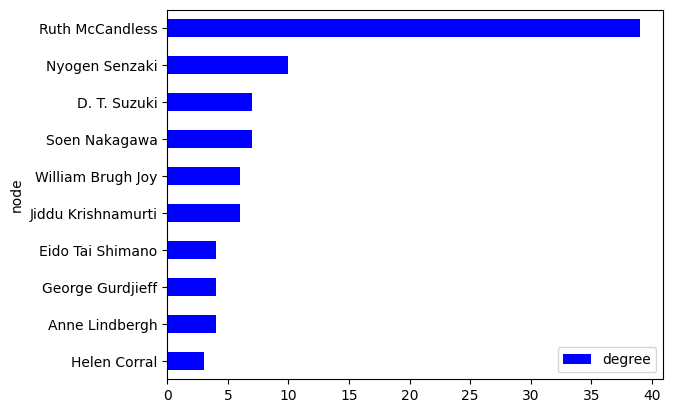

In [104]:
num_nodes_to_inspect = 10
degree_df[:num_nodes_to_inspect].plot(x='node', y='degree', color='blue', kind='barh').invert_yaxis()

In [43]:
# Betweenness Centrality of Characters 
betweenness_centrality = networkx.betweenness_centrality(G)
networkx.set_node_attributes(G, name='betweenness', values=betweenness_centrality)
betweenness_df = pd.DataFrame(G.nodes(data='betweenness'), columns=['node', 'betweenness'])
betweenness_df = betweenness_df.sort_values(by='betweenness', ascending=False)
betweenness_df

,node,betweenness
1,Ruth McCandless,0.923846
0,Nyogen Senzaki,0.029231
2,D. T. Suzuki,0.013333
5,Soen Nakagawa,0.013333
11,Jiddu Krishnamurti,0.009487
8,William Brugh Joy,0.003205
6,Eido Tai Shimano,0.001923
37,Anne Lindbergh,0.001282
17,Wallace Stegner,0.000897
10,Zentatsu Richard Baker,0.000897


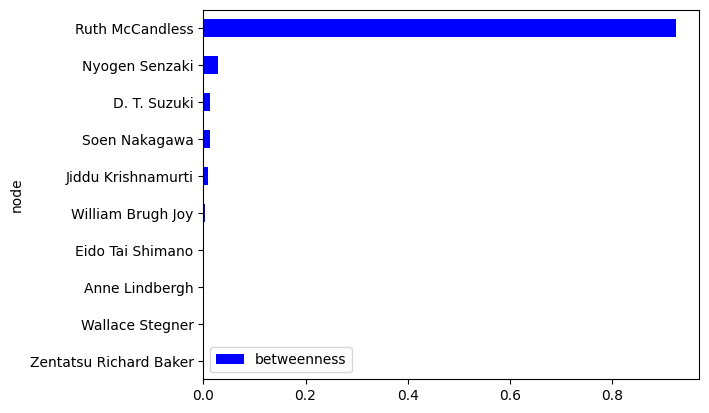

In [44]:
num_nodes_to_inspect = 10
betweenness_df[:num_nodes_to_inspect].plot(x='node', y='betweenness', color='blue', kind='barh').invert_yaxis()

In [92]:
# Building “Failled: Memoir Network by Professions Grouped Horizontally”

professions = {
    'Jiddu Krishnamurti': 'Indian Buddhist Practitioner',
    'Nyogen Senzaki': 'Japanese Buddhist Practitioner',
    'Soen Nakagawa': 'Japanese Buddhist Practitioner',
    'Vanda Scaravelli': 'Indian Buddhist Practitioner',
    'William Brugh Joy': 'Spiritualist',
    'Anne Lindbergh': 'Creator',
    'D. T. Suzuki': 'Japanese Buddhist Practitioner',
    'Ruth McCandless': 'Japanese Buddhist Practitioner',
    'Radha Rajagopal Sloss': 'Indian Buddhist Practitioner',
    'Soyen Shaku': 'Japanese Buddhist Practitioner',
    'Eido Tai Shimano': 'Japanese Buddhist Practitioner',
    'Sohaku Ogata': 'Japanese Buddhist Practitioner',
    'Helen Corral': 'Creator',
    'Edith R. Mirrielees': 'Educator',
    'Carolyn Conger': 'Spiritualist',
    'Harriet Doerr': 'Creator',
    'Mary Zimbalist': 'Creator',
    'Sōgen Asahina': 'Japanese Buddhist Practitioner',
    'Robert Baker Aitken': 'Japanese Buddhist Practitioner',
    'Brian Weiss': 'Spiritualist',
    'Wallace Stegner': 'Creator',
    'Shubin Tanahashi': 'Japanese Buddhist Practitioner',
    'Anthony Sokol': 'Educator',
    'Beatrice Wood': 'Creator',
    'Wilfred Stone': 'Educator',
    'Geoffrey Farwell': 'Organizational Personnel',
    'Zentatsu Richard Baker': 'Japanese Buddhist Practitioner',
    'Bill Rample': 'Organizational Personnel',
    'Noel Rodriguez': 'Japanese Buddhist Practitioner',
    'Peter Matthiessen': 'Creator',
    'Felix Wolff': 'Creator',
    'Helen Wolff': 'Creator',
    'Dennis Merzel': 'Japanese Buddhist Practitioner',
    'Manly P. Hall': 'Creator',
    'Paul Reps': 'Creator',
    'Frederick Spiegelberg': 'Educator',
    'John Dodds': 'Educator',
    'Gary Snyder': 'Creator',
    'Jack Kerouac': 'Creator',
    'Reginald Berkeley': 'Creator',
    'George Gurdjieff': 'Spiritualist',
    'Alan Watts': 'Japanese Buddhist Practitioner',
    'Robertson Davies': 'Creator',
    'Sam Zimbalist': 'Creator',
    'Elisabeth Haich': 'Indian Buddhist Practitioner',
    'Selvarajan Yesudian': 'Indian Buddhist Practitioner'
}

# Assign professions to nodes
for node in G.nodes():
    if node in professions:
        G.nodes[node]['profession'] = professions[node]

# Create a color palette for professions
profession_color_palette = {
    'Indian Buddhist Practitioner': Light[7][0],
    'Japanese Buddhist Practitioner': Light[7][1],
    'Creator': Light[7][2],
    'Educator': Light[7][3],
    'Spiritualist': Light[7][4],
    'Organizational Personnel': Light[7][5]
}

# Assign colors to nodes based on profession
for node in G.nodes():
    G.nodes[node]['profession_color'] = profession_color_palette[G.nodes[node]['profession']]

# Define custom positions to group by profession
profession_positions = {}
offset = 0
for profession, color in profession_color_palette.items():
    subgraph = G.subgraph([n for n, d in G.nodes(data=True) if d['profession'] == profession])
    pos = nx.spring_layout(subgraph, center=(offset, 0), scale=3)
    profession_positions.update(pos)
    offset += 5


# Define the colors used to highlight nodes and edges
node_highlight_color = 'purple'
edge_highlight_color = 'yellowgreen'

# Define tooltips
HOVER_TOOLTIPS = [
    ("Character", "@index"),
    ("Degree", "@degree"),
    ("Profession", "@profession"),
    ("Profession Color", "$color[swatch]:profession_color"),
]

title = 'Failled: Memoir Network by Professions Grouped Horizontally'

# Generate a plot with specified dimensions, toolbar options, and title
plot = figure(tooltips=HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
              x_range=Range1d(-10, 30), y_range=Range1d(-10, 30), title=title,
              width=800, height=800) 

# Construct a network graph object from the network data
network_graph = from_networkx(G, profession_positions)

# Adjust the sizes and colors of nodes based on their degree
network_graph.node_renderer.glyph = Scatter(size=30, fill_color='profession_color')

# Specify the colors used to highlight nodes
network_graph.node_renderer.hover_glyph = Scatter(size=25, fill_color=node_highlight_color, line_width=2)
network_graph.node_renderer.selection_glyph = Scatter(size=25, fill_color=node_highlight_color, line_width=2)

# Define the opacity and width for edges
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.3, line_width=1)

# Assign the colors used to highlight edges
network_graph.edge_renderer.selection_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)
network_graph.edge_renderer.hover_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)

# Enable highlighting of nodes and edges
network_graph.selection_policy = NodesAndLinkedEdges()
network_graph.inspection_policy = NodesAndLinkedEdges()

plot.renderers.append(network_graph)

# Add Labels to the graph
x, y = zip(*network_graph.layout_provider.graph_layout.values())
node_labels = list(G.nodes())
source = ColumnDataSource({'x': x, 'y': y, 'name': node_labels})
labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', text_font_size='15px', background_fill_alpha=0.7)
plot.renderers.append(labels)

# Add legend
legend_items = []
for prof, color in profession_color_palette.items():
    dummy_source = ColumnDataSource({'x': [0], 'y': [0]})
    dummy_renderer = plot.scatter(x='x', y='y', size=1, color=color, source=dummy_source, legend_label=prof)
    legend_item = LegendItem(label=prof, renderers=[dummy_renderer])

legend = Legend(items=legend_items, location=(0, -30))

show(plot)


In [93]:
# Building “Failled: Memoir Network by Professions Grouped Separately”

professions = {
    'Jiddu Krishnamurti': 'Indian Buddhist Practitioner',
    'Nyogen Senzaki': 'Japanese Buddhist Practitioner',
    'Soen Nakagawa': 'Japanese Buddhist Practitioner',
    'Vanda Scaravelli': 'Indian Buddhist Practitioner',
    'William Brugh Joy': 'Spiritualist',
    'Anne Lindbergh': 'Creator',
    'D. T. Suzuki': 'Japanese Buddhist Practitioner',
    'Ruth McCandless': 'Japanese Buddhist Practitioner',
    'Radha Rajagopal Sloss': 'Indian Buddhist Practitioner',
    'Soyen Shaku': 'Japanese Buddhist Practitioner',
    'Eido Tai Shimano': 'Japanese Buddhist Practitioner',
    'Sohaku Ogata': 'Japanese Buddhist Practitioner',
    'Helen Corral': 'Creator',
    'Edith R. Mirrielees': 'Educator',
    'Carolyn Conger': 'Spiritualist',
    'Harriet Doerr': 'Creator',
    'Mary Zimbalist': 'Creator',
    'Sōgen Asahina': 'Japanese Buddhist Practitioner',
    'Robert Baker Aitken': 'Japanese Buddhist Practitioner',
    'Brian Weiss': 'Spiritualist',
    'Wallace Stegner': 'Creator',
    'Shubin Tanahashi': 'Japanese Buddhist Practitioner',
    'Anthony Sokol': 'Educator',
    'Beatrice Wood': 'Creator',
    'Wilfred Stone': 'Educator',
    'Geoffrey Farwell': 'Organizational Personnel',
    'Zentatsu Richard Baker': 'Japanese Buddhist Practitioner',
    'Bill Rample': 'Organizational Personnel',
    'Noel Rodriguez': 'Japanese Buddhist Practitioner',
    'Peter Matthiessen': 'Creator',
    'Felix Wolff': 'Creator',
    'Helen Wolff': 'Creator',
    'Dennis Merzel': 'Japanese Buddhist Practitioner',
    'Manly P. Hall': 'Creator',
    'Paul Reps': 'Creator',
    'Frederick Spiegelberg': 'Educator',
    'John Dodds': 'Educator',
    'Gary Snyder': 'Creator',
    'Jack Kerouac': 'Creator',
    'Reginald Berkeley': 'Creator',
    'George Gurdjieff': 'Spiritualist',
    'Alan Watts': 'Japanese Buddhist Practitioner',
    'Robertson Davies': 'Creator',
    'Sam Zimbalist': 'Creator',
    'Elisabeth Haich': 'Indian Buddhist Practitioner',
    'Selvarajan Yesudian': 'Indian Buddhist Practitioner'
}

# Assign professions to nodes
for node in G.nodes():
    if node in professions:
        G.nodes[node]['profession'] = professions[node]

# Create a color palette for professions
profession_color_palette = {
    'Indian Buddhist Practitioner': Light[7][0],
    'Japanese Buddhist Practitioner': Light[7][1],
    'Creator': Light[7][2],
    'Educator': Light[7][3],
    'Spiritualist': Light[7][4],
    'Organizational Personnel': Light[7][5]
}

# Assign colors to nodes based on profession
for node in G.nodes():
    G.nodes[node]['profession_color'] = profession_color_palette[G.nodes[node]['profession']]

# Define custom positions to group by profession
profession_positions = {}
angle_step = 2 * 3.14159 / len(profession_color_palette)  # divide circle based on the number of professions
angle = 0
for profession, color in profession_color_palette.items():
    subgraph = G.subgraph([n for n, d in G.nodes(data=True) if d['profession'] == profession])
    sub_pos = nx.spring_layout(subgraph, center=(10 * np.cos(angle), 10 * np.sin(angle)), scale=1)
    profession_positions.update(sub_pos)
    angle += angle_step

# Normalize positions to fit within a circular layout
for key, (x, y) in profession_positions.items():
    norm = (x**2 + y**2)**0.5
    profession_positions[key] = (x / norm * 10, y / norm * 10)

# Define the colors used to highlight nodes and edges
node_highlight_color = 'purple'
edge_highlight_color = 'yellowgreen'

# Define tooltips
HOVER_TOOLTIPS = [
    ("Character", "@index"),
    ("Degree", "@degree"),
    ("Profession", "@profession"),
    ("Profession Color", "$color[swatch]:profession_color"),
]

title = 'Failled: Memoir Network by Professions Grouped Separately'

# Generate a plot with specified dimensions, toolbar options, and title
plot = figure(tooltips=HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
              x_range=Range1d(-15, 15), y_range=Range1d(-15, 15), title=title,
              width=800, height=800)

# Construct a network graph object from the network data
network_graph = from_networkx(G, profession_positions)

# Adjust the sizes and colors of nodes based on their degree
network_graph.node_renderer.glyph = Scatter(size=25, fill_color='profession_color')

# Specify the colors used to highlight nodes
network_graph.node_renderer.hover_glyph = Scatter(size=25, fill_color=node_highlight_color, line_width=2)
network_graph.node_renderer.selection_glyph = Scatter(size=25, fill_color=node_highlight_color, line_width=2)

# Define the opacity and width for edges
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.3, line_width=1)

# Assign the colors used to highlight edges
network_graph.edge_renderer.selection_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)
network_graph.edge_renderer.hover_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)

# Enable highlighting of nodes and edges
network_graph.selection_policy = NodesAndLinkedEdges()
network_graph.inspection_policy = NodesAndLinkedEdges()

plot.renderers.append(network_graph)

# Add Labels to the graph
x, y = zip(*network_graph.layout_provider.graph_layout.values())
node_labels = list(G.nodes())
source = ColumnDataSource({'x': x, 'y': y, 'name': node_labels})
labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', text_font_size='15px', background_fill_alpha=0.7)
plot.renderers.append(labels)

# Add legend
legend_items = []
dummy_source = ColumnDataSource({'x': [0], 'y': [0]})
dummy_renderer = plot.scatter(x='x', y='y', size=10, source=dummy_source)

for prof, color in profession_color_palette.items():
    legend_item = LegendItem(label=prof, renderers=[dummy_renderer], index=0)
    legend_items.append(legend_item)

legend = Legend(items=legend_items, location="right",
                label_text_font_size="8pt",  # Smaller font size
                glyph_height=10,  # Smaller glyph height
                glyph_width=10,  # Smaller glyph width
                label_standoff=5)  # Smaller distance between label and glyph

plot.add_layout(legend, 'right')

show(plot)


####  Result 6 and Result 7

They both failled to group nodes separately by profession in a circular layout.

## Discussion

## Analysis and Insights

The memoir network analysis reveals Ruth McCandless' extensive and varied connections with individuals across different fields of expertise. This network graph illustrates her pivotal role in connecting diverse groups, particularly within Zen Buddhism, Indian philosophy, and the creative industry. The modularity class graph highlights the community structures within her network, showing clusters of closely connected individuals. In contrast, the profession-based graphs categorize these individuals by their professional roles, providing a detailed view of their contributions.

### Observations from the Visual Representation:

1. **Dominance of Japanese Buddhist Practitioners**: One of the advantages of network analysis is its straightforwardness. The original file is one hundred pages long, so looking at the visualization helps save time. Japanese Buddhist practitioners are prominently represented in the network, possibly reflecting Ruth McCandless’s background as a Buddhist and author of two Buddhist books. This suggests a significant presence and influence of Japanese Buddhism within Ruth McCandless' professional circle. The centrality of Japanese Buddhist practitioners can also be perceived from the degree and betweenness centrality tables.

2. **Close Proximity of Writers, Japanese Buddhist Practitioners, and Spiritualists**: From the "Profession Co-occurrence Network" graph, it is clear that these groups of professions co-appear frequently. This is mainly because Ruth McCandless is the central figure of the graph and has the highest degree of betweenness centrality. As a Japanese Buddhist practitioner, she is closely connected to educators, writers, and spiritualists. In the graph, there are groupings of professions: Indian Buddhist practitioners, spiritualists, and Japanese Buddhist practitioners form a triangle. Actresses, publishers, film producers, and writers are closely connected. Educators and painters are also closely connected. This corresponds with the original text, making the visualization more straightforward compared to the original text.

3. **Connections with Other Professions**: The analysis reveals a trend among upper-class individuals, particularly writers and those in the entertainment industry, to explore religion and spirituality in the mid to late 20th century. Ruth McCandless's interactions with various spiritual leaders and philosophers reflect this broader cultural and intellectual curiosity. Some individuals have a genuine interest in Buddhism and seek more profound knowledge about Japanese Buddhism through their relationship with Ruth McCandless, while others are acquaintances from upper social circles. This can be perceived from the "Memoir Network by Modularity Class Without Ruth McCandless" graph. There are characters who are not connected with the large group mainly composed of Buddhist practitioners. These scattered individuals are only connected to Ruth McCandless and therefore are not interested in Buddhist religious activities, such as Gary Snyder and Jack Kerouac. This finding corresponds with the original text.

4. **Interest in Religion in the Literary and Creative Circles**: In the "Memoir Network by Modularity Class Without Ruth McCandless" graph, the largest group is the Buddhist practitioners. Additionally, there are writers like Wallace Stegner and Harriet Doerr. Cross-checking the original text, the representation is accurate. The graph underscores a notable interest in religion among people in the literary and creative fields during the 20th century. This period saw prominent figures seeking a deeper understanding and experiences beyond their professional domains. Religious groups, including Buddhists, were not isolated but rather deeply integrated into broader societal networks.

### Missing Relationships and Context:

1. Despite these insights, the current dataset has limitations. The network graph is based on known connections documented in the memoir, which may not capture all relevant relationships. For instance, informal or less documented interactions that could not be identified by name entities might be missing. In addition, the interviewer was not included in the network analysis.

2. A large portion of the text is about Ruth McCandless' personal life. Excluding this part from the network analysis might result in an incomplete understanding of her.

### Further Work and Complementary Data:

To complement the current analysis, further work could include:
1. **Incorporating Additional Sources**: Expanding the dataset to include letters, personal diaries, and other primary sources in the Ruth McCandless Collections could provide a more comprehensive view of Ruth McCandless’s network.
2. **Contextual Analysis**: Integrating data on historical events, cultural movements, and geographic locations could offer deeper insights into the dynamics of her connections.
3. **Temporal Analysis**: Examining how Ruth McCandless’s network evolved could reveal shifts in her influence and the changing nature of her relationships.

### Utility of Findings:

Understanding the structure of Ruth McCandless' network and the broader cultural trends it represents can have several applications:

1. **Historical Analysis**: Identifying key figures and their connections offers insights into historical relationships and influences, particularly in the context of the American Zen Buddhist movement and its development.
2. **Literary Studies**: Analyzing the network of authors, thinkers, and creators can reveal underlying connections and thematic links in their works, reflecting their spiritual and intellectual engagements.
3. **Social Network Analysis**: This visualization helps understand social structures, key influencers, and the dynamics of relationships within a group, providing a framework for studying other historical or contemporary networks.

The interactive nature of the graph, with its highlighting features and detailed tooltips, makes it a powerful tool for researchers and analysts to explore the network deeply. By examining visualizations, one can derive significant insights about the roles and influences of different individuals within the network.

Overall, the memoir network analysis not only sheds light on Ruth McCandless' significant contributions but also reflects broader cultural and intellectual trends of her time, providing a valuable resource for historical, literary, and social studies. This work underscores the interconnectedness of various belief systems and professional domains within the social fabric of the mid-20th century.

# Bibliography


[Review of “Iron Flute, The. Trans. and Ed. by” Nyogen Senzaki and Ruth Strout McCandless (Book Review)]. (1961). The Middle Way, 36, 84-. London: Buddhist Society UK.

Andrew Beveridge, & Jie Shan. (2016). Network of Thrones. Math Horizons, 23(4), 18–22. 
https://doi.org/10.4169/mathhorizons.23.4.18

Kitagawa, J. M. (1961). [Review of The Iron Flute; Zen Flesh, Zen Bones: A Collection of Zen and Pre-Zen Writings, by N. Senzaki, R. S. McCandless, & P. Reps]. The Journal of Religion, 41(4), 321–322.http://www.jstor.org/stable/1200996

Labatut, V., & Bost, X. (2019). Extraction and Analysis of Fictional Character Networks: a survey. In Figshare. https://doi.org/10.6084/m9.figshare.7993040.v3

LEVINE, G. P. A. (2017). ZEN SELLS. In Long Strange Journey: On Modern Zen, Zen Art, and Other Predicaments (pp. 195–238). University of Hawai’i Press. http://www.jstor.org/stable/j.ctvvn1jn.14

Love, J. P. (1963). [Review of The Iron Flute. 100 Zen Kōan with commentary by Genrō, Fūgai, and Nyōgen., by N. Senzaki & R. S. McCandless]. Monumenta Nipponica, 18(1/4), 386–387. https://doi.org/10.2307/2383157

Martino, R. D. (1954). [Review of Nyogen Senzaki and Ruth Strout McCandless: Buddhism and Zen (Book Review)]. The Review of Religion, 19(1), 54-. New York: Columbia University Press.

McCandless (Ruth S.) collection on Nyogen Senzaki. (n.d.). http://www.oac.cdlib.org/findaid/ark:/13030/c8wh2vs5/

Named Entity Recognition — Introduction to cultural Analytics & Python. (n.d.). 
https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/12-Named-Entity-Recognition.html#get-named-entities

Ōryū, G. (2000). The Iron Flute: 100 Zen Kōans. Tuttle Publishing.

Ruth Strout McCandless. (n.d.). GALE LITERATURE RESOURCE CENTER. https://go.gale.com/ps/i.do?p=LitRC&u=uclosangeles&id=GALE%7CH1000065800&v=2.1&it=r&sid=summon

Sasaki, R. F. (1960). A Bibliography of Translations of Zen (Ch’an) Works. Philosophy East and West, 10(3/4), 149–166. https://doi.org/10.2307/1397013

Senzaki, N., & McCandless, R. S. (1988). Buddhism and zen. Macmillan.

spaCy 101: Everything you need to know · spaCy Usage Documentation. (n.d.). spaCy 101: Everything You Need to Know. https://spacy.io/usage/spacy-101